In [1]:
import joblib
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_df = pd.read_csv("data/label_encoded_train_cleaned.csv")

X = train_df[["brand","model","milage","fuel_type","transmission","ext_col","int_col","accident","engine_hp","age"]]
y = train_df["price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [3]:
print(len(X_train))
print(len(X_test))

112111
28028


Normalization due to great difference between milage and other values

In [4]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Training the model

In [5]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

Predicting on 5 cars

In [6]:
y_pred = model.predict(X_test)

Visualsing the metrics

In [7]:
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("R²:", r2_score(y_test, y_pred))

MAE: 10129.59381359933
MSE: 183253260.35057825
R²: 0.5728906096240962


In [8]:
joblib.dump(model, "regression_model.pkl")
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']

        Feature   Coefficient  Abs_Coefficient
2        milage -7.841889e+03     7.841889e+03
9           age -5.886160e+03     5.886160e+03
8     engine_hp  5.455389e+03     5.455389e+03
7      accident -1.009280e+03     1.009280e+03
0         brand  6.822996e+02     6.822996e+02
6       int_col  4.646873e+02     4.646873e+02
3     fuel_type  3.168085e+02     3.168085e+02
5       ext_col -2.781970e+02     2.781970e+02
1         model  1.785009e+02     1.785009e+02
4  transmission -2.273737e-13     2.273737e-13


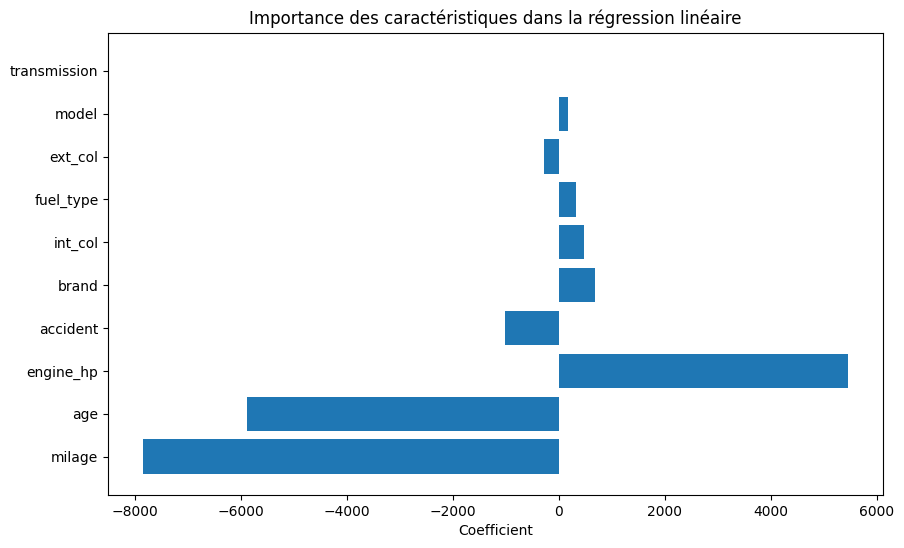

In [9]:
# Obtenir les coefficients
coefficients = model.coef_

# Créer un DataFrame pour associer les coefficients avec les features
features = X.columns
coeff_df = pd.DataFrame({"Feature": features, "Coefficient": coefficients})

# Trier par les coefficients en valeur absolue pour identifier les plus importantes
coeff_df["Abs_Coefficient"] = coeff_df["Coefficient"].abs()
coeff_df = coeff_df.sort_values(by="Abs_Coefficient", ascending=False)

# Afficher les résultats
print(coeff_df)
# Visualiser les coefficients
plt.figure(figsize=(10, 6))
plt.barh(coeff_df["Feature"], coeff_df["Coefficient"])
plt.xlabel("Coefficient")
plt.title("Importance des caractéristiques dans la régression linéaire")
plt.show()


# On remarque qu'il y a trois features principales

Engine_hp : Etant positive, pour chaque cheval en plus sur la voiture, elle gagne 5455$ de prix

Age : Négative, pour chaque année la voiture perd environ 6000$ de valeur

Milage : Négative aussi, chaque mile coute 8000$ à la cote de la voiture

